In [1]:
# Downloading Dataset and prerequisites
import urllib.request
import os
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
from sklearn.metrics import classification_report

if not os.path.exists("35k.zip"):
    print("Downloading 35k.zip.......")
    url1 = "https://www.dropbox.com/s/1h1v8mb2sv27gdp/35k.zip?dl=1"
    urllib.request.urlretrieve(url1, "35k.zip")
else:
    print("35k.zip already exists")

import zipfile
with zipfile.ZipFile("35k.zip", 'r') as zip_ref:
    zip_ref.extractall()
    
print("Dataset Downloaded")

if not os.path.exists("glove.6B.50d.txt"):
    print("Downloading glove.6B.50d.txt.......")
    url1 = "https://www.dropbox.com/s/7t087lwlkfjyfan/glove.6B.50d.txt?dl=1"
    urllib.request.urlretrieve(url1, "glove.6B.50d.txt")
else:
    print("glove.6B.50d.txt already exists")
print("Glove File Downloaded")

TrainTable = pd.DataFrame([[0,0]], columns=['message', 'label'])
TrainTable = TrainTable.iloc[1:]
TestTable = pd.DataFrame([[0,0]], columns=['message', 'label'])
TestTable = TestTable.iloc[1:]

foldernumbers = [1,2,5,6]
 
for i in foldernumbers:
    emails = load_files(f"enron{i}")
    x = np.column_stack((emails.data,emails.target))
    if i != 1:
        TempTrain = pd.DataFrame(x, columns =['message', 'label'])
        TrainTable = pd.concat([TrainTable, TempTrain])
    else:
        TestTable = pd.DataFrame(x, columns =['message', 'label'])   
TrainTable['message'] = TrainTable['message'].astype(str)
TestTable['message'] = TestTable['message'].astype(str)
TrainTable['label'] = TrainTable['label'].astype(int)
TestTable['label'] = TestTable['label'].astype(int)
print(TrainTable)
print(TestTable)
print("\n")

Dataset Downloaded
Glove File Downloaded
                                                message  label
0     b'Subject: all graphics software available , c...      1
1     b'Subject: it purchasing process\r\nas you all...      0
2     b"Subject: perfect visual solution for your bu...      1
3     b'Subject: re : term papers\r\nplease respond ...      0
4     b'Subject: also available levitra , cialis , a...      1
...                                                 ...    ...
5995  b'Subject: congratulations ! ! ! ! you have wo...      1
5996  b"Subject: new pharm site new great prices hum...      1
5997  b"Subject: do you remember us ?\r\n- easily lo...      1
5998  b'Subject: pre - approved application sun , 07...      1
5999  b"Subject: stop the inexpensive , get med ' ci...      1

[17032 rows x 2 columns]
                                                message  label
0     b'Subject: nesa / hea \' s 24 th annual meetin...      0
1     b'Subject: meter 1431 - nov 1999\r\ndaren -\r

In [41]:
# PREPROCESS and split into X_train, y_train.....
import re
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, LSTM, RNN
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dropout, Dense

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    return sentence[10:]

X_train = []
sentences = list(TrainTable['message'])
for sen in sentences:
    X_train.append(preprocess_text(sen))
print(X_train)
y_train = TrainTable['label']

X_test = []
sentences = list(TestTable['message'])
for sen in sentences:
    X_test.append(preprocess_text(sen))

y_test = TestTable['label']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Baseline Models

In [13]:
# Logistic Regression
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = TrainTable['message'].values
y_train = TrainTable['label'].values
X_test = TestTable['message'].values
y_test = TestTable['label'].values

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, pd.DataFrame(y_train))
# Accuracy
prediction = model.predict(X_test)

print("Logistic")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Logistic
accuracy: 0.8746
precision: 0.8914
recall: 0.8637
f1_score: 0.8831



In [16]:
#SVM
from sklearn.svm import SVC

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SVC())])

# Fitting the model
model = pipe.fit(X_train, pd.DataFrame(y_train))
# Accuracy
prediction = model.predict(X_test)
print("SVM")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

SVM
accuracy: 0.9179
precision: 0.9121
recall: 0.8966
f1_score: 0.9169



In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier())])

# Fitting the model
model = pipe.fit(X_train, pd.DataFrame(y_train))
# Accuracy
prediction = model.predict(X_test)
print("Decision Tree")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Decision Tree
accuracy: 0.8356
precision: 0.8125
recall: 0.8538
f1_score: 0.8313



In [19]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

# Fitting the model
model = pipe.fit(X_train, pd.DataFrame(y_train))
# Accuracy
prediction = model.predict(X_test)
print("Random Forest")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Random Forest
accuracy: 0.8969
precision: 0.9177
recall: 0.8903
f1_score: 0.9106



In [22]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier())])

# Fitting the model
model = pipe.fit(X_train, pd.DataFrame(y_train))
# Accuracy
prediction = model.predict(X_test)
print("KNN")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

KNN
accuracy: 0.7991
precision: 0.8137
recall: 0.8345
f1_score: 0.8178



In [ ]:
# Tokenization and RNN Implementation
traind = {}
for i in X_train:
    for j in i.split():
        if j not in traind:
            traind[j] = 0
            traind[j] += 1
        else:
            traind[j] += 1

tokenizer = Tokenizer(num_words=len(traind))
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 256

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size,
                    output_dim=32,
                    input_length=maxlen))
model1.add(LSTM(units=32))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
model1.summary()

history = model1.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           3606592   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 3,614,945
Trainable params: 3,614,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 20s 195ms/step - loss: 0.6312 - acc: 0.6323 - val_loss: 0.4114 - val_acc: 0.8421
Epoch 2/100
94/94 [==============================] - 18s 193ms/step - loss: 0.2398 - acc: 0.9331 - val_loss: 0.3066 - val_acc: 0.9117
Epoch 3/100
94/94 [==============================] - 18s 196ms/step - loss: 0.1410 - acc: 0.9688 - val_loss:

In [37]:
score = model1.evaluate(X_test, y_test, verbose=1)
prediction = model1.predict(X_test)
temp = []
for i in range(len(prediction)):
    if prediction[i]>0.5:
        temp.append(1)
    else:
        temp.append(0)
prediction = temp
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

162/162 [==============================] - 3s 18ms/step - loss: 0.2614 - acc: 0.9461
accuracy: 0.9461
precision: 0.9567
recall: 0.9679
f1_score: 0.9622


In [26]:
from keras import backend as K
from sklearn.metrics import classification_report

embed_layer_output = K.function([model1.layers[0].input],
                                  [model1.layers[0].output])
feat_train = embed_layer_output([X_train])[0]
feat_test = embed_layer_output([X_test])[0]
feat_train = feat_train.reshape((feat_train.shape[0],8192))
feat_test = feat_test.reshape((feat_test.shape[0],8192))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(feat_train, y_train)
pred = lr.predict(feat_test)

from sklearn.metrics import accuracy_score
print("Logistic Regression: ")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Logistic Regression: 

accuracy: 0.9363
precision: 0.9510
recall: 0.9431
f1_score: 0.9468



In [34]:
#SVM
from sklearn.svm import SVC
lr = SVC()
lr.fit(feat_train, y_train)
pred = lr.predict(feat_test)
from sklearn.metrics import accuracy_score
print("SVM : ")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

SVM : 

accuracy: 0.9294
precision: 0.9468
recall: 0.9311
f1_score: 0.9378


In [29]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
lr.fit(feat_train, y_train)
pred = lr.predict(feat_test)
from sklearn.metrics import accuracy_score
print("KNN : ")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

KNN : 

accuracy: 0.7691
precision: 0.8613
recall: 0.7735
f1_score: 0.7898



In [31]:
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
lr.fit(feat_train, y_train)
pred = lr.predict(feat_test)
from sklearn.metrics import accuracy_score
print("Decision Tree : ")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Decision Tree : 

accuracy: 0.7965
precision: 0.8363
recall: 0.8039
f1_score: 0.8098



In [32]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(feat_train, y_train)
pred = lr.predict(feat_test)
from sklearn.metrics import accuracy_score
print("Random Forest : ")
print("accuracy: {:.4f}".format(accuracy_score(y_test, prediction)))
print("precision: {:.4f}".format(precision_score(y_test,prediction,average="binary", pos_label=0)))
print("recall: {:.4f}".format(recall_score(y_test,prediction,average="binary", pos_label=0)))
print("f1_score: {:.4f}".format(f1_score(y_test,prediction,average="binary", pos_label=0)))

Random Forest : 

accuracy: 0.8963
precision: 0.9159
recall: 0.9003
f1_score: 0.9075



Data Analysis

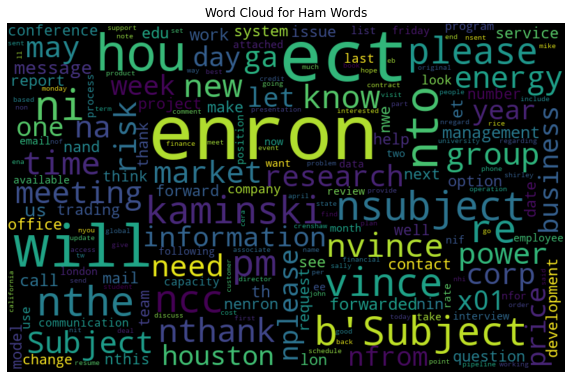

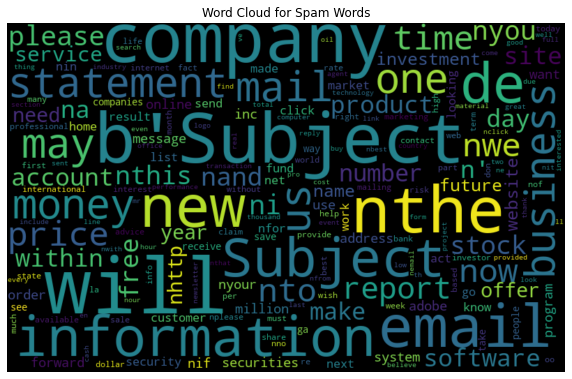

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

real_data = TrainTable[TrainTable["label"] == 0]
all_words = ' '.join([text for text in real_data['message']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Ham Words")
plt.show()

fake_data = TrainTable[TrainTable["label"] == 1]
all_words = ' '.join([text for text in fake_data['message']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Words")
plt.show()

In [42]:
ham = []
spam = []
for i in range(len(X_train)):
    if y_train.values[i] == 0:
        ham.append(X_train[i])
    else:
        spam.append(X_train[i])
ham = pd.DataFrame(ham, columns=['message'])
print(ham)
spam = pd.DataFrame(spam, columns=['message'])
print(spam)


ham_word_count = []
ham_word_list = []
for msg in ham.values:
    msg = " ".join(msg.tolist())
    ham_word_count.append(len(msg.split()))
    ham_word_list.extend(msg.split())
ham['word_count'] = ham_word_count

spam_word_count = []
spam_word_list = []
for msg in spam.values:
    msg = " ".join(msg.tolist())
    spam_word_count.append(len(msg.split()))
    spam_word_list.extend(msg.split())
spam['word_count'] = spam_word_count

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

ham_word_list = [word for word in ham_word_list if word not in stops and len(word)>=2]
spam_word_list = [word for word in spam_word_list if word not in stops and len(word)>=2]

ham_word_list = np.array(ham_word_list)
spam_word_list = np.array(spam_word_list)

from collections import Counter

counter = Counter(ham_word_list)
ham_most_common = counter.most_common(10)
ham_most_common = dict(ham_most_common)
print(ham_most_common)

counter = Counter(spam_word_list)
spam_most_common = counter.most_common(10)
spam_most_common = dict(spam_most_common)
print(spam_most_common)

                                                message
0     it purchasing process nas you all may be aware...
1     re term papers nplease respond to here is the ...
2     re grades nthank you mr kaminsky ni received y...
3     survey information email ncurrent notes user n...
4     re mathworks ngreat please keep us informed nl...
...                                                 ...
7356  ets quickplace ideabank outage non thursday fe...
7357  enron in action nare you having problems conne...
7358  see jeff skilling cnbc interview on iptv ndid ...
7359  january th update njeff michelle ken nhere the...
7360  oneok letter nattached is revised draft of let...

[7361 rows x 1 columns]
                                                message
0     all graphics software available cheap oem vers...
1     perfect visual solution for your business now ...
2     also available levitra cialis and viagra nkeep...
3     does your business depend on the online succes...
4     your online sales

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Word Count Class'),
 Text(0.5, 1.0, 'SPAM')]

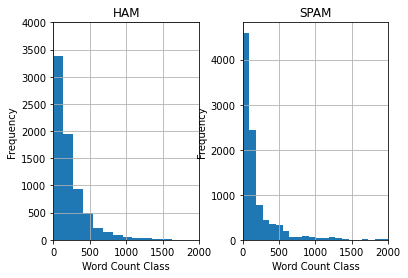

<Figure size 1440x720 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(20,10))
ham.hist(column='word_count',ax=ax[0],bins=50)
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,4000])
ax[0].set(xlabel='Word Count Class',ylabel='Frequency',title='HAM')
spam.hist(column='word_count',ax=ax[1],bins=50)
ax[1].set_xlim([0,2000])
ax[0].set_ylim([0,4000])
ax[1].set(xlabel='Word Count Class',ylabel='Frequency', title='SPAM')

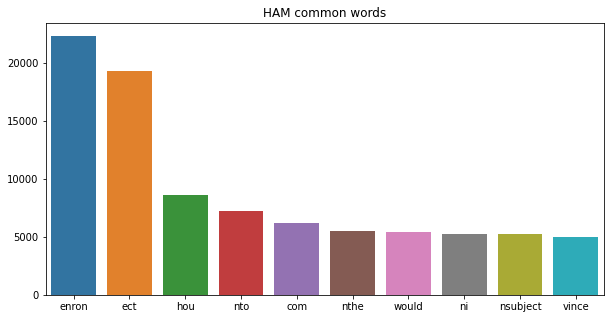

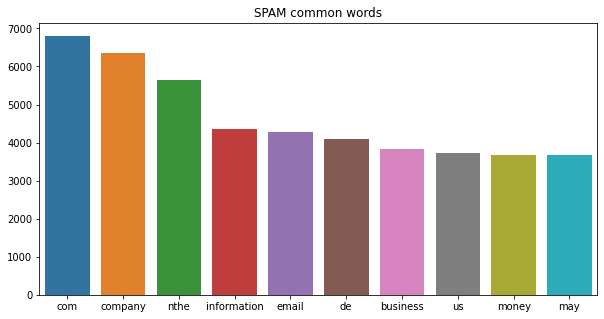

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("HAM common words")
sns.barplot(x=list(ham_most_common.keys()),y=list(ham_most_common.values()))

plt.figure(figsize=(10,5))
plt.title("SPAM common words")
sns.barplot(x=list(spam_most_common.keys()),y=list(spam_most_common.values()))

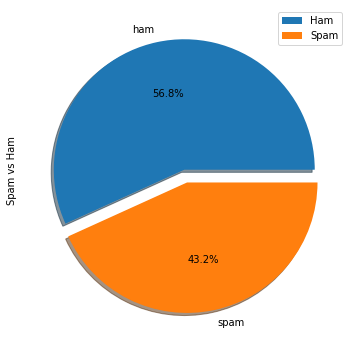

In [46]:
import matplotlib.pyplot as plt
TrainTable["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True, labels = ['ham', 'spam'])
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()